## Assignment: Image Generation with Diffusion Models

For this assignment, you will explore the use of diffusion models for image generation using the Hugging Face `transformers` library.

Take any model from https://huggingface.co/stabilityai

**Task:**

1.  **Choose a Diffusion Model:** Select a diffusion model available on the Hugging Face Hub. You can explore models from popular libraries like `diffusers`.
2.  **Load the Pipeline:** Load the appropriate pipeline for image generation using the chosen diffusion model.
3.  **Generate Images:** Generate one or more images using the pipeline with different prompts and parameters.
4.  **Display and Discuss:** Display the generated images and write a brief discussion about:
    *   The model you chose and why.
    *   The prompts and parameters you used for generation.
    *   Your observations about the quality and characteristics of the generated images.
    *   Any challenges or interesting findings you encountered.

**Requirements:**

*   Your code should be in a new code cell following this markdown section.
*   Clearly indicate the model you are using in your code or discussion.
*   Use `matplotlib` or other appropriate libraries to display the generated images within the notebook.
*   Provide a clear and concise discussion of your work in a markdown cell below the code.

This assignment will give you hands-on experience with state-of-the-art image generation techniques using the powerful tools provided by Hugging Face.

## 1. Importing necessary libraries

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import pipeline
import matplotlib.pyplot as plt

## 2. Loading the Stable Diffusion v1.5 Model |

In [3]:
model_id = "runwayml/stable-diffusion-v1-5"

# Load the Stable Diffusion pipeline (GPU if available)
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|█████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


## 3. Generate images with different prompts

In [4]:
prompts = [ '''A high-speed, wide-angle cinematic shot of a professional rider on a sleek, black futuristic motorcycle, 
aggressively chasing a red Formula 1 car on a rain-slicked race track at night. The scene is bathed in vibrant neon lighting,
with motion blur and water reflections. (4K, hyper-detailed, octane render, dynamic lighting)''',
'''Birds in the Sky: A breathtaking, photorealistic long-shot of a flock of majestic black cranes soaring through a serene sky at dawn.
The sun's golden light breaks through soft, misty clouds, creating a sense of peace and tranquility. (cinematic lighting, ultra-detailed,
volumetric clouds, rule of thirds, award-winning photography)''',
''' A low-angle, cinematic shot of a lone rider on an advanced off-road bike, kicking up lunar dust as they ride across the barren, 
cratered surface of the moon. Earth hangs majestically in the black sky, with stars twinkling in the distance.
The helmet visor reflects the desolate landscape. (Hyperrealistic, 8K, high contrast, dramatic lighting, shot on IMAX film)''',
    ''' A whimsical, ultra-detailed digital painting of a glowing, ethereal forest at night. Giant, bioluminescent mushrooms and magical flowers illuminate a hidden pathway.
    A tiny, glowing pixie flits past ancient trees. (Fantasy art, soft ambient light, intricate details, vibrant colors, Studio Ghibli inspired)''',
''' A bustling, high-angle view of a dystopian cyberpunk city at night. Towering skyscrapers with holographic advertisements cast a neon glow on the rain-slicked streets below, 
filled with futuristic vehicles and a crowd of diverse characters. (Cinematic lighting, dynamic shadows, 8K resolution, detailed urban landscape, trending on ArtStation)'''
]

images = []
for prompt in prompts:
    image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
    images.append((prompt, image))

100%|███████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.73it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dramatic lighting , shot on imax film )']
100%|███████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]


## 4. Load a caption generation pipeline

In [5]:
captioner = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

/home/kirsh/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/transformers/models/auto/modeling_auto.py:2242: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


## 5. Display images with captions

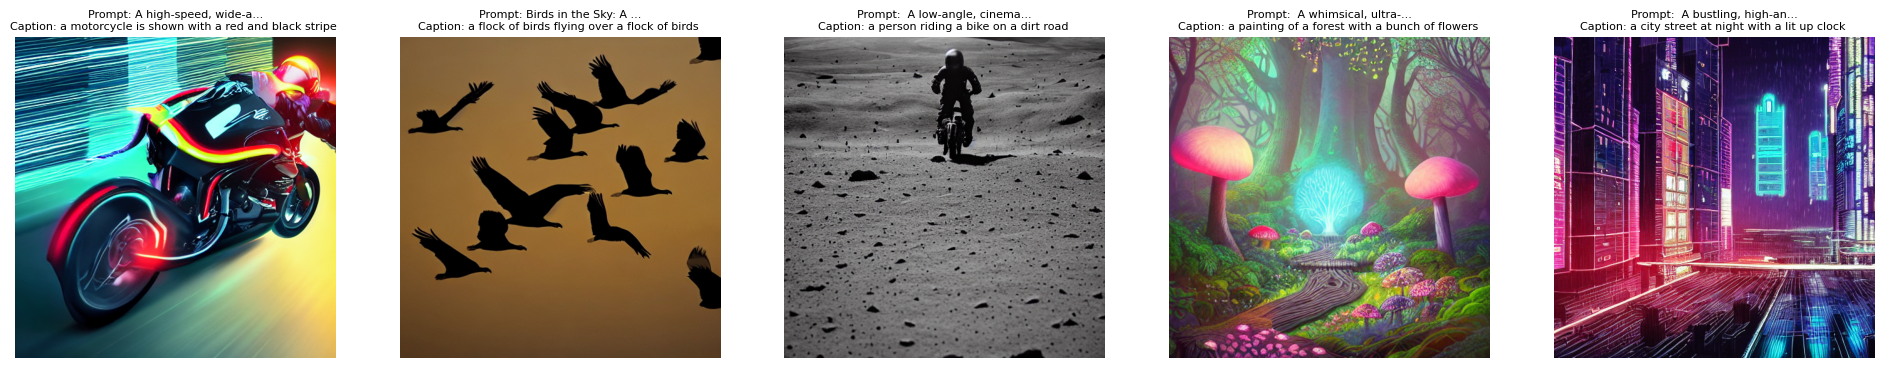

In [8]:
fig, axes = plt.subplots(1, len(images), figsize=(24,24))
for ax, (prompt, img) in zip(axes, images):
    ax.imshow(img)
    
    ax.axis("off")
    # Generate caption for each image
    caption = captioner(img)[0]['generated_text']
    ax.set_title(f"Prompt: {prompt[:20]}...\nCaption: {caption}", fontsize=8)
plt.show()

## Extended Discussion: Image Captioning

In addition to generating images using **Stable Diffusion v1.5**, I integrated an **image captioning model** (`nlpconnect/vit-gpt2-image-captioning`) from Hugging Face.

### Caption Generation
After generating images, I passed them through the captioning pipeline, which produced short descriptive sentences. For example:
- a motor cycle is shown with a red and black stripe .
- A flock of birds flying over a flock of birds.
- A person riding a bike on a dirt road.
- a painting of a forest with af bunch of flowers
- a city street at night with a lit up clock

### Observations
- The captions are okay but not so good on this images like the propmt we give for this images.
- The images are generated is good but not exaclty like we give prompt and expect the images but it is good according to this open source project.
- Despite these limitations, combining image generation with captioning provides a powerful workflow for creativity and accessibility (e.g., generating and describing art for visually impaired users).

This extension shows how Hugging Face pipelines can be combined like **building blocks** to create end-to-end AI applications.


# For the Same prompt the google gemini generate this type of images 

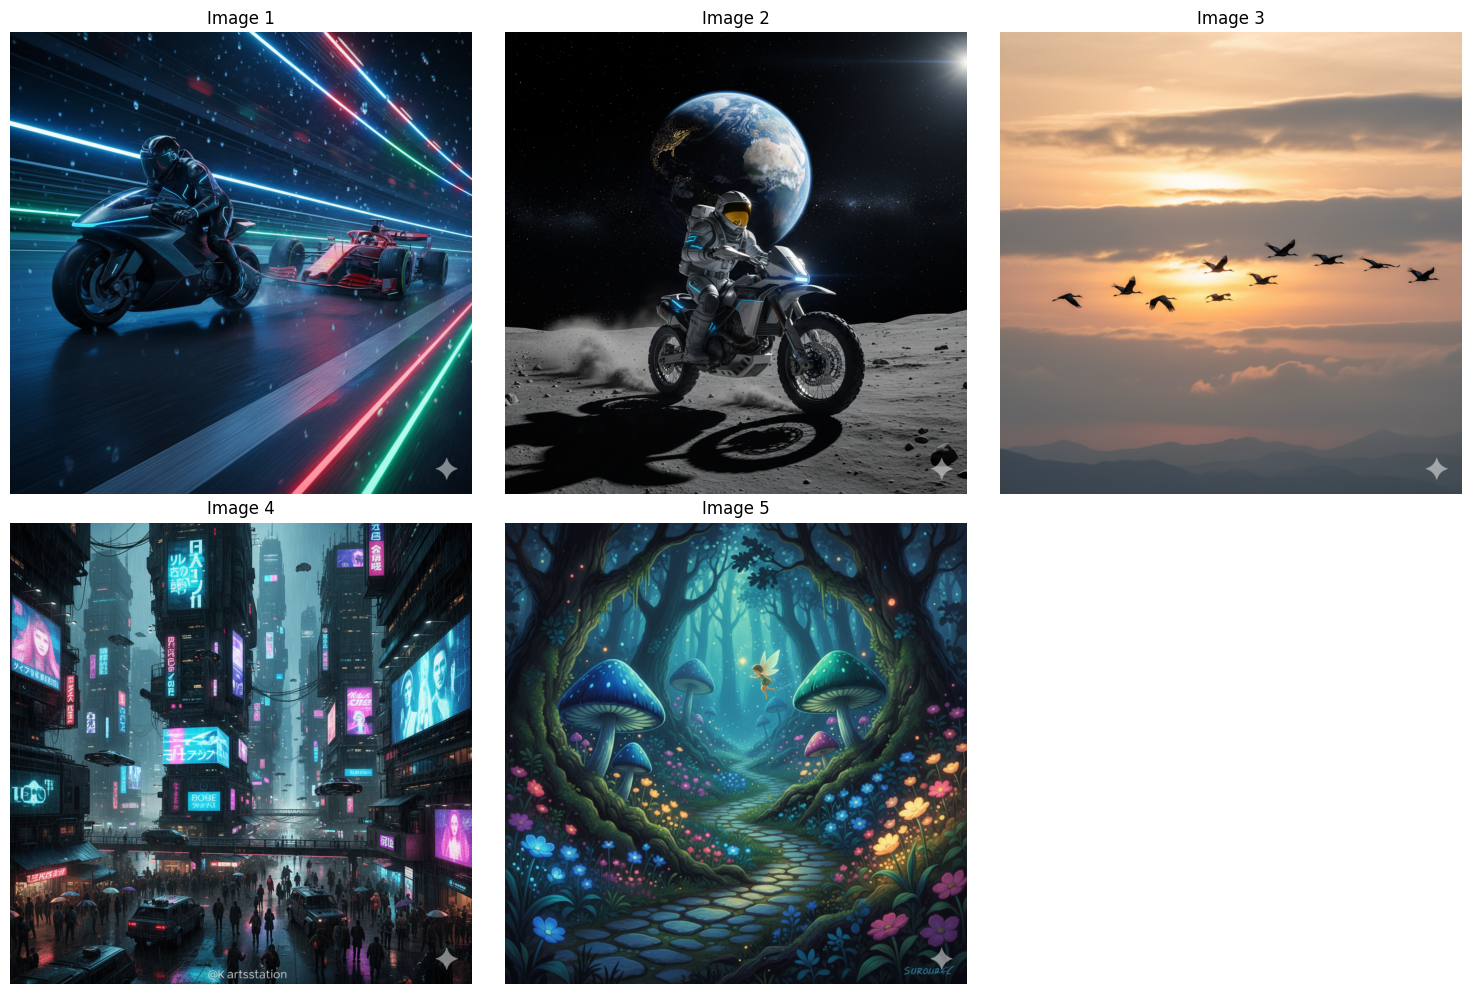

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os # Import the os module for path manipulation

# List of image 
image_paths = [
    'bike_f1.png',
    'bike_on_moon.png',
    'birds.png',
    'city.png',
    'forest.png'    
]

# Create a figure and a set of subplots
# We need 5 plots, so a 2x3 grid is suitable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the image paths and display each image
for i, path in enumerate(image_paths):
    if os.path.exists(path): # Check if the file exists
        try:
            # Open the image from the local file path
            image = Image.open(path)
            
            # Display the image on the i-th subplot
            axes[i].imshow(image)
            axes[i].set_title(f'Image {i+1}')
            axes[i].axis('off') # Hide the axes

        except IOError as e:
            print(f"Error opening image {path}: {e}")
            axes[i].axis('off')
    else:
        print(f"Error: Image file not found at {path}")
        axes[i].axis('off')

# Hide any unused subplots
for i in range(len(image_paths), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
# Show the plot
plt.show()